In [2]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import re
import matplotlib.pyplot as plt 
import nltk
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv')
# view the top rows
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
data.shape

(31962, 3)

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [6]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
# remove special characters, numbers, punctuations
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [8]:
#remove words having less tha 3
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [9]:
#tokenization
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [10]:
train, test = train_test_split(data, test_size = 0.2, stratify = data['label'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((25569, 4), (6393, 4))

In [11]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [12]:
#Stiching this tokenized tweet together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tidy_tweet'] = tokenized_tweet

In [13]:
#Story Generation 

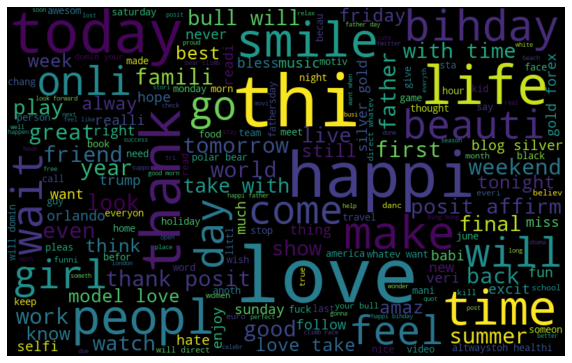

In [14]:
#Word Cloud of all tokens
all_words = ' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

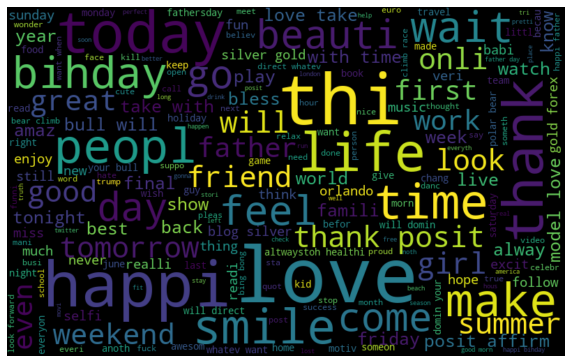

In [15]:
#Words in non racist/sexist tweets
normal_words =' '.join([text for text in data['tidy_tweet'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

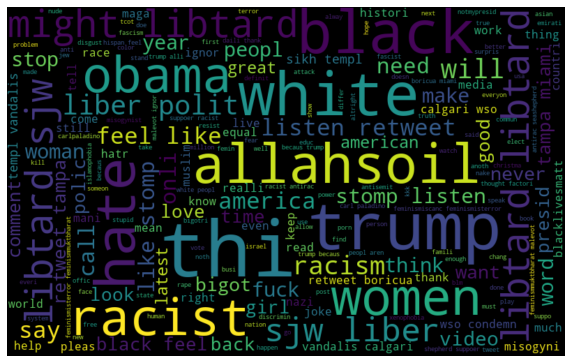

In [16]:
#Negative Words
negative_words = ' '.join([text for text in data['tidy_tweet'][data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
# Hashtag impact on tweets
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(data['tidy_tweet'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['tidy_tweet'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

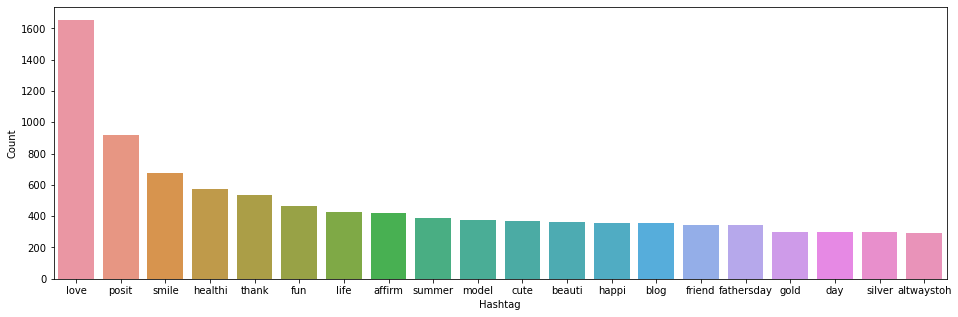

In [19]:
# Top hastags in Non-Racist Tweets
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

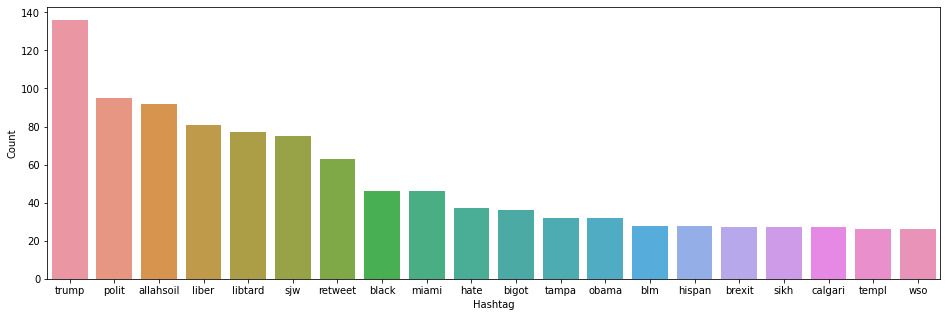

In [20]:
# Racist/Sexist Hashtags in tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [21]:
# Bag of Word Implementaion
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['tidy_tweet'])
bow.shape

(31962, 1000)

In [22]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['tidy_tweet'])

In [23]:
# Model Implementaion  BOW - Logistic Regression
xtrain_bow, xvalid_bow, ytrain, yvalid  =train_test_split(bow, data['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5337781484570475

In [24]:
# Model Implementaion  TFIDF -Logistic Regression 
xtrain_tfidf = tfidf[ytrain.index]
xvalid_tfidf = tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5328596802841918

In [25]:
#Model Implementaion BOW - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)


0.5524256651017214

In [26]:
#Model Implementaion TFIDF - Random Forest

rftfidf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rftfidf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)


0.5617173524150268

In [42]:
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]


In [43]:
train, test = train_test_split(data, test_size = 0.2, stratify = data['label'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((25569, 4), (6393, 4))

In [45]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(max_df=0.90, min_df=2,lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', RandomForestClassifier(n_estimators=400, random_state=11))])

In [46]:
pipeline.fit(train.tweet, train.label)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow',

In [47]:
pipeline.predict(text)

array([0], dtype=int64)

In [15]:
# sample tweet
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# predict the label using the pipeline
pipeline.predict(text)
## >> array([0])

array([0], dtype=int64)

In [48]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']